In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
%matplotlib inline

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

con = duckdb.connect()

# Business Understanding

### Checking number of rows and null columns

In [3]:
# Check number of rows and null columns
files = ['2022Q1','2022Q2','2022Q3','2022Q4','2023Q1','2023Q2']
ser = pd.Series()

for i in files:
    df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)
    df.columns = ["POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "SELLER", "SERVICER",
                        "MASTER_SERVICER", "ORIG_RATE", "CURR_RATE", "ORIG_UPB", "ISSUANCE_UPB",
                        "CURRENT_UPB", "ORIG_TERM", "ORIG_DATE", "FIRST_PAY", "LOAN_AGE",
                        "REM_MONTHS", "ADJ_REM_MONTHS", "MATR_DT", "OLTV", "OCLTV",
                        "NUM_BO", "DTI", "CSCORE_B", "CSCORE_C", "FIRST_FLAG", "PURPOSE",
                        "PROP", "NO_UNITS", "OCC_STAT", "STATE", "MSA", "ZIP", "MI_PCT",
                        "PRODUCT", "PPMT_FLG", "IO", "FIRST_PAY_IO", "MNTHS_TO_AMTZ_IO",
                        "DLQ_STATUS", "PMT_HISTORY", "MOD_FLAG", "MI_CANCEL_FLAG", "Zero_Bal_Code",
                        "ZB_DTE", "LAST_UPB", "RPRCH_DTE", "CURR_SCHD_PRNCPL", "TOT_SCHD_PRNCPL",
                        "UNSCHD_PRNCPL_CURR", "LAST_PAID_INSTALLMENT_DATE", "FORECLOSURE_DATE",
                        "DISPOSITION_DATE", "FORECLOSURE_COSTS","PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
                        "ASSET_RECOVERY_COSTS", "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", "NET_SALES_PROCEEDS",
                        "CREDIT_ENHANCEMENT_PROCEEDS", "REPURCHASES_MAKE_WHOLE_PROCEEDS",
                        "OTHER_FORECLOSURE_PROCEEDS", "NON_INTEREST_BEARING_UPB", "PRINCIPAL_FORGIVENESS_AMOUNT",
                        "ORIGINAL_LIST_START_DATE", "ORIGINAL_LIST_PRICE", "CURRENT_LIST_START_DATE",
                        "CURRENT_LIST_PRICE", "ISSUE_SCOREB", "ISSUE_SCOREC", "CURR_SCOREB",
                        "CURR_SCOREC", "MI_TYPE", "SERV_IND", "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT", "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", "HOMEREADY_PROGRAM_INDICATOR",
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", "RELOCATION_MORTGAGE_INDICATOR",
                        "ZERO_BALANCE_CODE_CHANGE_DATE", "LOAN_HOLDBACK_INDICATOR", "LOAN_HOLDBACK_EFFECTIVE_DATE",
                        "DELINQUENT_ACCRUED_INTEREST", "PROPERTY_INSPECTION_WAIVER_INDICATOR",
                        "HIGH_BALANCE_LOAN_INDICATOR", "ARM_5_YR_INDICATOR", "ARM_PRODUCT_TYPE",
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
                        "INTEREST_RATE_CHANGE_DATE", "PAYMENT_CHANGE_DATE", "ARM_INDEX",
                        "ARM_CAP_STRUCTURE", "INITIAL_INTEREST_RATE_CAP", "PERIODIC_INTEREST_RATE_CAP",
                        "LIFETIME_INTEREST_RATE_CAP", "MARGIN", "BALLOON_INDICATOR",
                        "PLAN_NUMBER", "FORBEARANCE_INDICATOR", "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
                        "DEAL_NAME", "RE_PROCS_FLAG", "ADR_TYPE", "ADR_COUNT", "ADR_UPB"]
    # Remove loans that have been removed from reference pool
    df = df[df['CURRENT_UPB']>0]
    print(df.shape)
    x = df.isna().sum()
    if i == '2022Q1':
        ser = x
    else:
        ser += x

print(np.size(ser[ser >=0.95 * (532733+1034384+2190400+4108718+7849513+13224420)].index.to_list()))
columns_removal = ser[ser >=0.95 * (532733+1034384+2190400+4108718+7849513+13224420)].index.to_list()

# Clean up variable
del ser, df, x

/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_4797/267296124.py:6: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)


(13224420, 108)


/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_4797/267296124.py:6: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)


(7849513, 108)


/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_4797/267296124.py:6: DtypeWarning: Columns (104,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)


(4108718, 108)


/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_4797/267296124.py:6: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)


(2190400, 108)


/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_4797/267296124.py:6: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)


(1034384, 108)


/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_4797/267296124.py:6: DtypeWarning: Columns (101,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)


(532733, 108)


### Remove if 95% of the columns have null values 

In [3]:
print(np.size(ser[ser >=0.95 * (532733+1034384+2190400+4108718+7849513+13224420)].index.to_list()))
columns_removal = ser[ser >=0.95 * (532733+1034384+2190400+4108718+7849513+13224420)].index.to_list()

# Clean up variable
del ser, df, x

61


### Convert into parquet files with column names for direct query via duckdb

In [4]:
# Convert into parquet files with column names, ease duckdb queries
files = ['2022Q1','2022Q2','2022Q3','2022Q4','2023Q1','2023Q2']

for i in files:
    df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)
    df.columns = ["POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "SELLER", "SERVICER",
                        "MASTER_SERVICER", "ORIG_RATE", "CURR_RATE", "ORIG_UPB", "ISSUANCE_UPB",
                        "CURRENT_UPB", "ORIG_TERM", "ORIG_DATE", "FIRST_PAY", "LOAN_AGE",
                        "REM_MONTHS", "ADJ_REM_MONTHS", "MATR_DT", "OLTV", "OCLTV",
                        "NUM_BO", "DTI", "CSCORE_B", "CSCORE_C", "FIRST_FLAG", "PURPOSE",
                        "PROP", "NO_UNITS", "OCC_STAT", "STATE", "MSA", "ZIP", "MI_PCT",
                        "PRODUCT", "PPMT_FLG", "IO", "FIRST_PAY_IO", "MNTHS_TO_AMTZ_IO",
                        "DLQ_STATUS", "PMT_HISTORY", "MOD_FLAG", "MI_CANCEL_FLAG", "Zero_Bal_Code",
                        "ZB_DTE", "LAST_UPB", "RPRCH_DTE", "CURR_SCHD_PRNCPL", "TOT_SCHD_PRNCPL",
                        "UNSCHD_PRNCPL_CURR", "LAST_PAID_INSTALLMENT_DATE", "FORECLOSURE_DATE",
                        "DISPOSITION_DATE", "FORECLOSURE_COSTS","PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
                        "ASSET_RECOVERY_COSTS", "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", "NET_SALES_PROCEEDS",
                        "CREDIT_ENHANCEMENT_PROCEEDS", "REPURCHASES_MAKE_WHOLE_PROCEEDS",
                        "OTHER_FORECLOSURE_PROCEEDS", "NON_INTEREST_BEARING_UPB", "PRINCIPAL_FORGIVENESS_AMOUNT",
                        "ORIGINAL_LIST_START_DATE", "ORIGINAL_LIST_PRICE", "CURRENT_LIST_START_DATE",
                        "CURRENT_LIST_PRICE", "ISSUE_SCOREB", "ISSUE_SCOREC", "CURR_SCOREB",
                        "CURR_SCOREC", "MI_TYPE", "SERV_IND", "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT", "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", "HOMEREADY_PROGRAM_INDICATOR",
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", "RELOCATION_MORTGAGE_INDICATOR",
                        "ZERO_BALANCE_CODE_CHANGE_DATE", "LOAN_HOLDBACK_INDICATOR", "LOAN_HOLDBACK_EFFECTIVE_DATE",
                        "DELINQUENT_ACCRUED_INTEREST", "PROPERTY_INSPECTION_WAIVER_INDICATOR",
                        "HIGH_BALANCE_LOAN_INDICATOR", "ARM_5_YR_INDICATOR", "ARM_PRODUCT_TYPE",
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
                        "INTEREST_RATE_CHANGE_DATE", "PAYMENT_CHANGE_DATE", "ARM_INDEX",
                        "ARM_CAP_STRUCTURE", "INITIAL_INTEREST_RATE_CAP", "PERIODIC_INTEREST_RATE_CAP",
                        "LIFETIME_INTEREST_RATE_CAP", "MARGIN", "BALLOON_INDICATOR",
                        "PLAN_NUMBER", "FORBEARANCE_INDICATOR", "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
                        "DEAL_NAME", "RE_PROCS_FLAG", "ADR_TYPE", "ADR_COUNT", "ADR_UPB"]
    # Remove loans that have been removed from reference pool
    df = df[df['CURRENT_UPB']>0]
    df['ADR_TYPE'] = df['ADR_TYPE'].astype(str)
    df['FORBEARANCE_INDICATOR'] = df['FORBEARANCE_INDICATOR'].astype(str)
    df = df.drop(columns=columns_removal)
    df.to_parquet(i+'.parquet')
    print(i+'--- Export Completed')

/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_44391/397506200.py:5: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)


2022Q1--- Export Completed


/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_44391/397506200.py:5: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)


2022Q2--- Export Completed


/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_44391/397506200.py:5: DtypeWarning: Columns (104,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)


2022Q3--- Export Completed


/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_44391/397506200.py:5: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)


2022Q4--- Export Completed


/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_44391/397506200.py:5: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)


2023Q1--- Export Completed


/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_44391/397506200.py:5: DtypeWarning: Columns (101,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFL/'+ i +'.csv',sep='|',header=None)


2023Q2--- Export Completed


### Vintage analysis (origination year against reporting year and NPL rate)

In [29]:
con.execute("""
   SELECT  
      *
   FROM '*.parquet' limit 5
   """).df().columns

Index(['LOAN_ID', 'ACT_PERIOD', 'CHANNEL', 'SELLER', 'SERVICER', 'ORIG_RATE',
       'CURR_RATE', 'ORIG_UPB', 'CURRENT_UPB', 'ORIG_TERM', 'ORIG_DATE',
       'FIRST_PAY', 'LOAN_AGE', 'REM_MONTHS', 'ADJ_REM_MONTHS', 'MATR_DT',
       'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C', 'FIRST_FLAG',
       'PURPOSE', 'PROP', 'NO_UNITS', 'OCC_STAT', 'STATE', 'MSA', 'ZIP',
       'MI_PCT', 'PRODUCT', 'PPMT_FLG', 'IO', 'DLQ_STATUS', 'PMT_HISTORY',
       'MOD_FLAG', 'TOT_SCHD_PRNCPL', 'MI_TYPE', 'SERV_IND',
       'HOMEREADY_PROGRAM_INDICATOR', 'RELOCATION_MORTGAGE_INDICATOR',
       'PROPERTY_INSPECTION_WAIVER_INDICATOR', 'HIGH_BALANCE_LOAN_INDICATOR',
       'FORBEARANCE_INDICATOR',
       'HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR', 'ADR_TYPE',
       '__index_level_0__'],
      dtype='object')

In [6]:
con.execute("""
   SELECT  
      cast(right(ACT_PERIOD,4) as int) as ACT_YR,
      cast(right(FIRST_PAY,4) as int) as FIRST_PAY_YR,
      sum(case when DLQ_STATUS>=3 then 1 else 0 end) as npl_cnt,
      count(*) as total
   FROM '*.parquet' group by ACT_YR, FIRST_PAY_YR order by FIRST_PAY_YR,ACT_YR
   """).df()

,ACT_YR,FIRST_PAY_YR,npl_cnt,total
0,2022,2021,376.0,277422
1,2023,2021,543.0,144330
2,2022,2022,12705.0,15284831
3,2023,2022,36173.0,11182882
4,2022,2023,0.0,86732
5,2023,2023,537.0,1963971


#### Handling of origination year more than reporting year in the dataset

Filter out first pay date > account reporting date

In [103]:
vintage = con.execute("""
   SELECT  
      cast(right(ACT_PERIOD,4) as int) as ACT_YR,
      cast(right(FIRST_PAY,4) as int) as FIRST_PAY_YR,
      sum(case when DLQ_STATUS>=3 then 1 else 0 end) as npl_cnt,
      count(*) as total
   FROM '*.parquet' 
   where cast(strptime(concat(left(ACT_PERIOD,len(ACT_PERIOD)-4),'/',right(ACT_PERIOD,4)),'%m/%Y') as date)
         >cast(strptime(concat(left(FIRST_PAY,len(FIRST_PAY)-4),'/',right(FIRST_PAY,4)),'%m/%Y') as date)
   group by ACT_YR, FIRST_PAY_YR order by FIRST_PAY_YR,ACT_YR
   """).df()
vintage['npl_percentage'] = vintage['npl_cnt']/vintage['total']*100
vintage

,ACT_YR,FIRST_PAY_YR,npl_cnt,total,npl_percentage
0,2022,2021,376.0,277422,0.135534
1,2023,2021,543.0,144330,0.376221
2,2022,2022,12705.0,11420227,0.111250
3,2023,2022,36173.0,11182882,0.323468
4,2023,2023,537.0,1047844,0.051248


In [10]:
vintage =con.execute("""
   SELECT  
      cast(right(ACT_PERIOD,4) as int) as ACT_YR,
      sum(case when DLQ_STATUS>=3 then 1 else 0 end) as npl_cnt,
      count(*) as total
   FROM '*.parquet' 
   where cast(strptime(concat(left(ACT_PERIOD,len(ACT_PERIOD)-4),'/',right(ACT_PERIOD,4)),'%m/%Y') as date)
         >cast(strptime(concat(left(FIRST_PAY,len(FIRST_PAY)-4),'/',right(FIRST_PAY,4)),'%m/%Y') as date)
   group by ACT_YR order by ACT_YR
   """).df()
vintage['npl_percentage'] = vintage['npl_cnt']/vintage['total']*100
vintage

,ACT_YR,npl_cnt,total,npl_percentage
0,2022,13081.0,11697649,0.111826
1,2023,37253.0,12375056,0.301033


### Roll Rate Analysis 

In [11]:
## Roll rate analysis
roll = con.execute("""
   with ref as         
   (SELECT
   cast(case when left(right(PMT_HISTORY,4),2)='XX' 
   then null else left(right(PMT_HISTORY,4),2) end as int) as MTH1,
   sum(case when dlq_status = 0 then 1 else 0 end) as mia_0,
   sum(case when dlq_status = 1 then 1 else 0 end) as mia_1,
   sum(case when dlq_status = 2 then 1 else 0 end) as mia_2,
   sum(case when dlq_status >= 3 then 1 else 0 end) as npl,
   count(*) as cnt 
   FROM '*.parquet' where mth1 is not null group by mth1)
   select 
   case when mth1 >=3 then 'NPL' else mth1 end as curr_mia,
   sum(mia_0) as mia0,sum(mia_1) as mia1,sum(mia_2) as mia2,sum(npl) as npl,sum(cnt) as total
   from ref group by curr_mia
   """).df()
roll

,curr_mia,mia0,mia1,mia2,npl,total
0,0,26086824.0,127026.0,730.0,151.0,26214731.0
1,1,91566.0,38929.0,24810.0,150.0,155455.0
2,2,6023.0,2490.0,5072.0,13745.0,27330.0
3,NPL,4758.0,442.0,649.0,36288.0,42137.0


In [12]:
roll_pct = roll.copy()
roll_pct['mia0'] = roll_pct['mia0']/roll_pct['total']*100
roll_pct['mia1'] = roll_pct['mia1']/roll_pct['total']*100
roll_pct['mia2'] = roll_pct['mia2']/roll_pct['total']*100
roll_pct['npl'] = roll_pct['npl']/roll_pct['total']*100
roll_pct

,curr_mia,mia0,mia1,mia2,npl,total
0,0,99.512080,0.484560,0.002785,0.000576,26214731.0
1,1,58.901933,25.041974,15.959602,0.096491,155455.0
2,2,22.038053,9.110867,18.558361,50.292719,27330.0
3,NPL,11.291739,1.048959,1.540214,86.119088,42137.0


# Data Preparation

### Check target class distribution
Target Class : account that is newly turn into mia 1 with at least 1 month historical repayment 
<br>
Filter:
<br> 
1. scheduled first payment date < account reporting date (at least 1 month historical repayment)
2. from mia 0 to mia 1

In [17]:
target_dist = con.execute("""
   SELECT  
      cast(case when left(right(PMT_HISTORY,4),2)='XX' 
      then null else left(right(PMT_HISTORY,4),2) end as int) as from_mia,
      dlq_status as curr_mia,
      count(*) as cnt
   FROM '*.parquet' 
   where FIRST_PAY < ACT_PERIOD
   and cast(right(ACT_PERIOD,4) as int) = 2022
   and from_mia = 0 and curr_mia in (0,1)  group by from_mia,curr_mia
   """).df()

target_dist['pct'] = target_dist['cnt']/ (target_dist['cnt'].sum())*100
target_dist

,from_mia,curr_mia,cnt,pct
0,0,0,11278360,99.549526
1,0,1,51036,0.450474


#### Removal of irrelevant columns

In [20]:
con.execute("""
   SELECT  
      LOAN_ID,
      cast(right(ACT_PERIOD,4) as int) as ACT_YR,
      cast(strptime(concat(left(ACT_PERIOD,len(ACT_PERIOD)-4),'/',right(ACT_PERIOD,4)),'%m/%Y') as date) as ACT_PERIOD,
      CHANNEL,ORIG_UPB,CURRENT_UPB,ORIG_TERM,
      cast(right(FIRST_PAY,4) as int) as FIRST_PAY_YR,
      cast(strptime(concat(left(FIRST_PAY,len(FIRST_PAY)-4),'/',right(FIRST_PAY,4)),'%m/%Y') as date) as FIRST_PAY,
      LOAN_AGE,ADJ_REM_MONTHS,OCLTV,NUM_BO,DTI,
      case when FIRST_FLAG= 'Y' then 1 else 0 end as FIRST_FLAG,
      PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE, ifnull(MI_PCT,0) as MI_PCT,DLQ_STATUS,
      cast(case when left(right(PMT_HISTORY,4),2)='XX' then null else left(right(PMT_HISTORY,4),2) end as int) as MTH1,
      cast(case when left(right(PMT_HISTORY,6),2)='XX' then null else left(right(PMT_HISTORY,6),2) end as int) as MTH2,
      cast(case when left(right(PMT_HISTORY,8),2)='XX' then null else left(right(PMT_HISTORY,8),2) end as int) as MTH3,
      cast(case when left(right(PMT_HISTORY,10),2)='XX' then null else left(right(PMT_HISTORY,10),2) end as int) as MTH4,
      cast(case when left(right(PMT_HISTORY,12),2)='XX' then null else left(right(PMT_HISTORY,12),2) end as int) as MTH5,
      cast(case when left(right(PMT_HISTORY,14),2)='XX' then null else left(right(PMT_HISTORY,14),2) end as int) as MTH6,
      greatest(MTH1,MTH2,MTH3,MTH4,MTH5,MTH6) as MAX_MIA,ifnull(MI_TYPE,0) as MI_TYPE,
      case when SERV_IND = 'Y' then 1 else 0 end as  SERV_IND
   FROM '*.parquet' 
    where FIRST_PAY<ACT_PERIOD
    and ACT_YR = 2022
    and cast(case when left(right(PMT_HISTORY,4),2)='XX' then null else left(right(PMT_HISTORY,4),2) end as int) = 0 
    and DLQ_STATUS in (0,1)
   limit 5
   """).df()

,LOAN_ID,ACT_YR,ACT_PERIOD,CHANNEL,ORIG_UPB,CURRENT_UPB,ORIG_TERM,FIRST_PAY_YR,FIRST_PAY,LOAN_AGE,ADJ_REM_MONTHS,OCLTV,NUM_BO,DTI,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,DLQ_STATUS,MTH1,MTH2,MTH3,MTH4,MTH5,MTH6,MAX_MIA,MI_TYPE,SERV_IND
0,133801946,2022,2022-09-01,R,140000.0,140000.0,360,2022,2022-08-01,2.0,359.0,53,1,45.0,1,P,PU,1,P,FL,0.0,1,0,0,NaN,NaN,NaN,NaN,0,0.0,0
1,133801946,2022,2022-11-01,R,140000.0,139000.0,360,2022,2022-08-01,4.0,356.0,53,1,45.0,1,P,PU,1,P,FL,0.0,0,0,1,0.0,0.0,NaN,NaN,1,0.0,0
2,133801946,2022,2022-12-01,R,140000.0,139000.0,360,2022,2022-08-01,5.0,354.0,53,1,45.0,1,P,PU,1,P,FL,0.0,0,0,0,1.0,0.0,0.0,NaN,1,0.0,0
3,133801947,2022,2022-09-01,R,135000.0,133000.0,180,2022,2022-08-01,2.0,177.0,31,2,15.0,0,P,PU,1,P,MS,0.0,0,0,0,NaN,NaN,NaN,NaN,0,0.0,0
4,133801947,2022,2022-10-01,R,135000.0,133000.0,180,2022,2022-08-01,3.0,176.0,31,2,15.0,0,P,PU,1,P,MS,0.0,0,0,0,0.0,NaN,NaN,NaN,0,0.0,0


In [18]:
# Check pmt history derivation
con.execute("""
   SELECT  
      pmt_history,dlq_status,
      cast(case when left(right(PMT_HISTORY,4),2)='XX' then null else left(right(PMT_HISTORY,4),2) end as int) as MTH1,
      cast(case when left(right(PMT_HISTORY,6),2)='XX' then null else left(right(PMT_HISTORY,6),2) end as int) as MTH2,
      cast(case when left(right(PMT_HISTORY,8),2)='XX' then null else left(right(PMT_HISTORY,8),2) end as int) as MTH3,
      cast(case when left(right(PMT_HISTORY,10),2)='XX' then null else left(right(PMT_HISTORY,10),2) end as int) as MTH4,
      cast(case when left(right(PMT_HISTORY,12),2)='XX' then null else left(right(PMT_HISTORY,12),2) end as int) as MTH5,
      cast(case when left(right(PMT_HISTORY,14),2)='XX' then null else left(right(PMT_HISTORY,14),2) end as int) as MTH6
   FROM '*.parquet' 
    where --FIRST_PAY<ACT_PERIOD
    --and cast(case when left(right(PMT_HISTORY,4),2)='XX' then null else left(right(PMT_HISTORY,4),2) end as int) = 0 
    cast(case when left(right(PMT_HISTORY,8),2)='XX' then null else left(right(PMT_HISTORY,4),2) end as int) =4
    and loan_age<=6
    limit 10
   """).df()

,PMT_HISTORY,DLQ_STATUS,MTH1,MTH2,MTH3,MTH4,MTH5,MTH6
0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000102030405,5,4,3,2,1,0,NaN
1,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000102030405,5,4,3,2,1,0,NaN
2,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00000102030405,5,4,3,2,1,0,0.0
3,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000102030404,4,4,3,2,1,0,NaN
4,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00010203040404,4,4,4,3,2,1,0.0
5,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00000102030405,5,4,3,2,1,0,0.0
6,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00010102030405,5,4,3,2,1,1,0.0
7,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000102030400,0,4,3,2,1,0,NaN
8,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000102030400,0,4,3,2,1,0,NaN
9,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000102030405,5,4,3,2,1,0,NaN


### Downsampling and upweighting

#### Downsampling majority by scale of 3

In [2]:
good = con.execute("""
   SELECT  
      LOAN_ID,
      cast(right(ACT_PERIOD,4) as int) as ACT_YR,
      cast(strptime(concat(left(ACT_PERIOD,len(ACT_PERIOD)-4),'/',right(ACT_PERIOD,4)),'%m/%Y') as date) as ACT_PERIOD,
      CHANNEL,ORIG_UPB,CURRENT_UPB,ORIG_TERM,
      cast(right(FIRST_PAY,4) as int) as FIRST_PAY_YR,
      cast(strptime(concat(left(FIRST_PAY,len(FIRST_PAY)-4),'/',right(FIRST_PAY,4)),'%m/%Y') as date) as FIRST_PAY,
      LOAN_AGE,case when ADJ_REM_MONTHS is null then REM_MONTHS else ADJ_REM_MONTHS end as ADJ_REM_MONTHS,OCLTV,NUM_BO,DTI,
      case when FIRST_FLAG= 'Y' then 1 else 0 end as FIRST_FLAG,
      PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE, ifnull(MI_PCT,0) as MI_PCT,DLQ_STATUS,
      cast(case when left(right(PMT_HISTORY,4),2)='XX' then null else left(right(PMT_HISTORY,4),2) end as float) as MTH1,
      cast(case when left(right(PMT_HISTORY,6),2)='XX' then null else left(right(PMT_HISTORY,6),2) end as float) as MTH2,
      cast(case when left(right(PMT_HISTORY,8),2)='XX' then null else left(right(PMT_HISTORY,8),2) end as float) as MTH3,
      cast(case when left(right(PMT_HISTORY,10),2)='XX' then null else left(right(PMT_HISTORY,10),2) end as float) as MTH4,
      cast(case when left(right(PMT_HISTORY,12),2)='XX' then null else left(right(PMT_HISTORY,12),2) end as float) as MTH5,
      cast(case when left(right(PMT_HISTORY,14),2)='XX' then null else left(right(PMT_HISTORY,14),2) end as float) as MTH6,
      ifnull(MI_TYPE,0) as MI_TYPE,
      case when SERV_IND = 'Y' then 1 else 0 end as  SERV_IND
   FROM '*.parquet' 
    where FIRST_PAY<ACT_PERIOD
    and ACT_YR = 2022
    and cast(case when left(right(PMT_HISTORY,4),2)='XX' then null else left(right(PMT_HISTORY,4),2) end as int) = 0 
    and DLQ_STATUS = 0 
   using sample 1 percent (bernoulli) 
   """).df()
good.shape

(113031, 30)

#### Upweighting minority by 3

In [3]:
bad = con.execute("""
   SELECT  
      LOAN_ID,
      cast(right(ACT_PERIOD,4) as int) as ACT_YR,
      cast(strptime(concat(left(ACT_PERIOD,len(ACT_PERIOD)-4),'/',right(ACT_PERIOD,4)),'%m/%Y') as date) as ACT_PERIOD,
      CHANNEL,ORIG_UPB,CURRENT_UPB,ORIG_TERM,
      cast(right(FIRST_PAY,4) as int) as FIRST_PAY_YR,
      cast(strptime(concat(left(FIRST_PAY,len(FIRST_PAY)-4),'/',right(FIRST_PAY,4)),'%m/%Y') as date) as FIRST_PAY,
      LOAN_AGE,case when ADJ_REM_MONTHS is null then REM_MONTHS else ADJ_REM_MONTHS end as ADJ_REM_MONTHS,OCLTV,NUM_BO,DTI,
      case when FIRST_FLAG= 'Y' then 1 else 0 end as FIRST_FLAG,
      PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE, ifnull(MI_PCT,0) as MI_PCT,DLQ_STATUS,
      cast(case when left(right(PMT_HISTORY,4),2)='XX' then null else left(right(PMT_HISTORY,4),2) end as float) as MTH1,
      cast(case when left(right(PMT_HISTORY,6),2)='XX' then null else left(right(PMT_HISTORY,6),2) end as float) as MTH2,
      cast(case when left(right(PMT_HISTORY,8),2)='XX' then null else left(right(PMT_HISTORY,8),2) end as float) as MTH3,
      cast(case when left(right(PMT_HISTORY,10),2)='XX' then null else left(right(PMT_HISTORY,10),2) end as float) as MTH4,
      cast(case when left(right(PMT_HISTORY,12),2)='XX' then null else left(right(PMT_HISTORY,12),2) end as float) as MTH5,
      cast(case when left(right(PMT_HISTORY,14),2)='XX' then null else left(right(PMT_HISTORY,14),2) end as float) as MTH6,
      ifnull(MI_TYPE,0) as MI_TYPE,
      case when SERV_IND = 'Y' then 1 else 0 end as  SERV_IND
   FROM '*.parquet' 
    where FIRST_PAY<ACT_PERIOD 
    and ACT_YR = 2022
    and cast(case when left(right(PMT_HISTORY,4),2)='XX' then null else left(right(PMT_HISTORY,4),2) end as int) = 0 
    and DLQ_STATUS = 1
   """).df()
print(bad.shape)
# bad = pd.concat([bad]*5,ignore_index=True)
# print(bad.shape)

(51036, 30)


#### Concat all and check class distribution

In [4]:
df = pd.concat([bad,good])
df.shape

(164067, 30)

In [5]:
class_sum = df.groupby('DLQ_STATUS')['LOAN_ID'].count().reset_index()
class_sum['PCT'] = class_sum['LOAN_ID']/ class_sum['LOAN_ID'].sum()
class_sum

,DLQ_STATUS,LOAN_ID,PCT
0,0,113031,0.688932
1,1,51036,0.311068


In [6]:
import gc
del good, bad
gc.collect()

16

In [7]:
df.head()

,LOAN_ID,ACT_YR,ACT_PERIOD,CHANNEL,ORIG_UPB,CURRENT_UPB,ORIG_TERM,FIRST_PAY_YR,FIRST_PAY,LOAN_AGE,ADJ_REM_MONTHS,OCLTV,NUM_BO,DTI,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,DLQ_STATUS,MTH1,MTH2,MTH3,MTH4,MTH5,MTH6,MI_TYPE,SERV_IND
0,133801946,2022,2022-09-01,R,140000.0,140000.00,360,2022,2022-08-01,2.0,359.0,53,1,45.0,1,P,PU,1,P,FL,0.0,1,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0
1,133801983,2022,2022-10-01,C,437000.0,436000.00,360,2022,2022-08-01,3.0,358.0,60,1,46.0,0,C,SF,1,P,OR,0.0,1,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0
2,133802028,2022,2022-10-01,R,76000.0,76000.00,360,2022,2022-09-01,2.0,359.0,80,1,41.0,0,P,SF,1,I,AL,0.0,1,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0
3,133802049,2022,2022-12-01,C,105000.0,102807.71,360,2022,2022-05-01,8.0,345.0,75,1,40.0,0,P,SF,2,I,PA,0.0,1,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0
4,133802085,2022,2022-08-01,C,624000.0,623000.00,360,2022,2022-07-01,2.0,359.0,80,1,48.0,1,P,PU,1,P,CA,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0


In [8]:
df = df.set_index('LOAN_ID')

In [10]:
df.head()

,ACT_YR,ACT_PERIOD,CHANNEL,ORIG_UPB,CURRENT_UPB,ORIG_TERM,FIRST_PAY_YR,FIRST_PAY,LOAN_AGE,ADJ_REM_MONTHS,OCLTV,NUM_BO,DTI,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,DLQ_STATUS,MTH1,MTH2,MTH3,MTH4,MTH5,MTH6,MI_TYPE,SERV_IND
LOAN_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
133801946,2022,2022-09-01,R,140000.0,140000.00,360,2022,2022-08-01,2.0,359.0,53,1,45.0,1,P,PU,1,P,FL,0.0,1,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0
133801983,2022,2022-10-01,C,437000.0,436000.00,360,2022,2022-08-01,3.0,358.0,60,1,46.0,0,C,SF,1,P,OR,0.0,1,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0
133802028,2022,2022-10-01,R,76000.0,76000.00,360,2022,2022-09-01,2.0,359.0,80,1,41.0,0,P,SF,1,I,AL,0.0,1,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0
133802049,2022,2022-12-01,C,105000.0,102807.71,360,2022,2022-05-01,8.0,345.0,75,1,40.0,0,P,SF,2,I,PA,0.0,1,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0
133802085,2022,2022-08-01,C,624000.0,623000.00,360,2022,2022-07-01,2.0,359.0,80,1,48.0,1,P,PU,1,P,CA,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0


### Removal of irrelevant columns

In [9]:
df = df.drop(columns=['ACT_YR','ACT_PERIOD','FIRST_PAY_YR','FIRST_PAY'])

### Feature Engineering

#### Derive features

In [10]:
df['TENURE_RATIO'] = (df['ADJ_REM_MONTHS']/df['ORIG_TERM']).round(2)
df['UPB_PAID_RATIO'] = (df['CURRENT_UPB']/df['ORIG_UPB']).round(2)
df['MAX_MIA_6M'] = df[['MTH1','MTH2','MTH3','MTH4','MTH5','MTH6']].max(axis=1)
df['MAX_MIA_3M'] = df[['MTH1','MTH2','MTH3']].max(axis=1)
df['DIFF_MAX_MIA'] = df['MAX_MIA_3M'] - df['MAX_MIA_6M']
df['AVG_MIA_6M'] = df[['MTH1','MTH2','MTH3','MTH4','MTH5','MTH6']].mean(axis=1)
df['AVG_MIA_3M'] = df[['MTH1','MTH2','MTH3']].mean(axis=1)
df['DIFF_AVG_MIA'] = df['AVG_MIA_3M'] - df['AVG_MIA_6M']
df['STD_MIA_6M'] = df[['MTH1','MTH2','MTH3','MTH4','MTH5','MTH6']].std(axis=1)
df['STD_MIA_6M'] = df['STD_MIA_6M'].fillna(0)
df['SKEW_MIA_6M'] = df[['MTH1','MTH2','MTH3','MTH4','MTH5','MTH6']].skew(axis=1)
df['SKEW_MIA_6M'] = df['SKEW_MIA_6M'].fillna(0)
df['DTI'] = df['DTI'].fillna(999)

In [11]:
df[df['MAX_MIA_6M']>2].tail()

,CHANNEL,ORIG_UPB,CURRENT_UPB,ORIG_TERM,LOAN_AGE,ADJ_REM_MONTHS,OCLTV,NUM_BO,DTI,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,DLQ_STATUS,MTH1,MTH2,MTH3,MTH4,MTH5,MTH6,MI_TYPE,SERV_IND,TENURE_RATIO,UPB_PAID_RATIO,MAX_MIA_6M,MAX_MIA_3M,DIFF_MAX_MIA,AVG_MIA_6M,AVG_MIA_3M,DIFF_AVG_MIA,STD_MIA_6M,SKEW_MIA_6M
LOAN_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
132044592,B,580000.0,573259.14,360,7.0,353.0,67,1,36.0,0,C,SF,1,P,KY,0.0,0,0.0,0.0,3.0,3.0,2.0,1.0,0.0,0,0.98,0.99,3.0,3.0,0.0,1.500000,1.000000,-0.500000,1.378405,0.000000
132106167,R,237000.0,233451.08,360,9.0,351.0,70,1,39.0,0,R,PU,1,P,MD,0.0,0,0.0,0.0,2.0,2.0,1.0,3.0,0.0,0,0.98,0.99,3.0,2.0,-1.0,1.333333,0.666667,-0.666667,1.211060,0.075066
132160066,R,150000.0,145248.18,180,7.0,173.0,25,2,20.0,0,P,PU,1,P,CO,0.0,0,0.0,5.0,4.0,3.0,2.0,1.0,0.0,0,0.96,0.97,5.0,5.0,0.0,2.500000,3.000000,0.500000,1.870829,0.000000
132160066,R,150000.0,143876.47,180,9.0,171.0,25,2,20.0,0,P,PU,1,P,CO,0.0,0,0.0,0.0,0.0,5.0,4.0,3.0,0.0,0,0.95,0.96,5.0,0.0,-5.0,2.000000,0.000000,-2.000000,2.280351,0.303597
132197555,R,370000.0,365394.06,360,8.0,352.0,70,1,43.0,0,C,SF,1,P,CA,0.0,0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0,0.98,0.99,3.0,0.0,-3.0,0.833333,0.000000,-0.833333,1.329160,1.206607


#### One-hot encoding

In [12]:
# df['MI_TYPE'] = df['MI_TYPE'].astype(int).astype(str)
df = pd.get_dummies(df, columns = ['CHANNEL', 'PURPOSE','PROP','OCC_STAT','MI_TYPE'],dtype=int) 
df = df.drop(columns=['MTH1','MTH2','MTH3','MTH4','MTH5','MTH6','STATE'])

In [13]:
df[df['STD_MIA_6M']==0].head()

,ORIG_UPB,CURRENT_UPB,ORIG_TERM,LOAN_AGE,ADJ_REM_MONTHS,OCLTV,NUM_BO,DTI,FIRST_FLAG,NO_UNITS,MI_PCT,DLQ_STATUS,SERV_IND,TENURE_RATIO,UPB_PAID_RATIO,MAX_MIA_6M,MAX_MIA_3M,DIFF_MAX_MIA,AVG_MIA_6M,AVG_MIA_3M,DIFF_AVG_MIA,STD_MIA_6M,SKEW_MIA_6M,CHANNEL_B,CHANNEL_C,CHANNEL_R,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,MI_TYPE_0.0,MI_TYPE_1.0,MI_TYPE_2.0
LOAN_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
133801946,140000.0,140000.00,360,2.0,359.0,53,1,45.0,1,1,0.0,1,0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
133801983,437000.0,436000.00,360,3.0,358.0,60,1,46.0,0,1,0.0,1,0,0.99,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
133802028,76000.0,76000.00,360,2.0,359.0,80,1,41.0,0,1,0.0,1,0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0
133802049,105000.0,102807.71,360,8.0,345.0,75,1,40.0,0,2,0.0,1,0,0.96,0.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
133802085,624000.0,623000.00,360,2.0,359.0,80,1,48.0,1,1,0.0,1,0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0


In [14]:
df.isna().any()

ORIG_UPB          False
CURRENT_UPB       False
ORIG_TERM         False
LOAN_AGE          False
ADJ_REM_MONTHS    False
OCLTV             False
NUM_BO            False
DTI               False
FIRST_FLAG        False
NO_UNITS          False
MI_PCT            False
DLQ_STATUS        False
SERV_IND          False
TENURE_RATIO      False
UPB_PAID_RATIO    False
MAX_MIA_6M        False
MAX_MIA_3M        False
DIFF_MAX_MIA      False
AVG_MIA_6M        False
AVG_MIA_3M        False
DIFF_AVG_MIA      False
STD_MIA_6M        False
SKEW_MIA_6M       False
CHANNEL_B         False
CHANNEL_C         False
CHANNEL_R         False
PURPOSE_C         False
PURPOSE_P         False
PURPOSE_R         False
PROP_CO           False
PROP_CP           False
PROP_MH           False
PROP_PU           False
PROP_SF           False
OCC_STAT_I        False
OCC_STAT_P        False
OCC_STAT_S        False
MI_TYPE_0.0       False
MI_TYPE_1.0       False
MI_TYPE_2.0       False
dtype: bool

In [15]:
df[['AVG_MIA_6M','AVG_MIA_3M','DIFF_AVG_MIA','STD_MIA_6M','SKEW_MIA_6M']].count()

AVG_MIA_6M      164067
AVG_MIA_3M      164067
DIFF_AVG_MIA    164067
STD_MIA_6M      164067
SKEW_MIA_6M     164067
dtype: int64

In [16]:
df.head()

,ORIG_UPB,CURRENT_UPB,ORIG_TERM,LOAN_AGE,ADJ_REM_MONTHS,OCLTV,NUM_BO,DTI,FIRST_FLAG,NO_UNITS,MI_PCT,DLQ_STATUS,SERV_IND,TENURE_RATIO,UPB_PAID_RATIO,MAX_MIA_6M,MAX_MIA_3M,DIFF_MAX_MIA,AVG_MIA_6M,AVG_MIA_3M,DIFF_AVG_MIA,STD_MIA_6M,SKEW_MIA_6M,CHANNEL_B,CHANNEL_C,CHANNEL_R,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,MI_TYPE_0.0,MI_TYPE_1.0,MI_TYPE_2.0
LOAN_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
133801946,140000.0,140000.00,360,2.0,359.0,53,1,45.0,1,1,0.0,1,0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
133801983,437000.0,436000.00,360,3.0,358.0,60,1,46.0,0,1,0.0,1,0,0.99,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
133802028,76000.0,76000.00,360,2.0,359.0,80,1,41.0,0,1,0.0,1,0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0
133802049,105000.0,102807.71,360,8.0,345.0,75,1,40.0,0,2,0.0,1,0,0.96,0.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
133802085,624000.0,623000.00,360,2.0,359.0,80,1,48.0,1,1,0.0,1,0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0


# Modeling

### Correlation matrix

<AxesSubplot:>

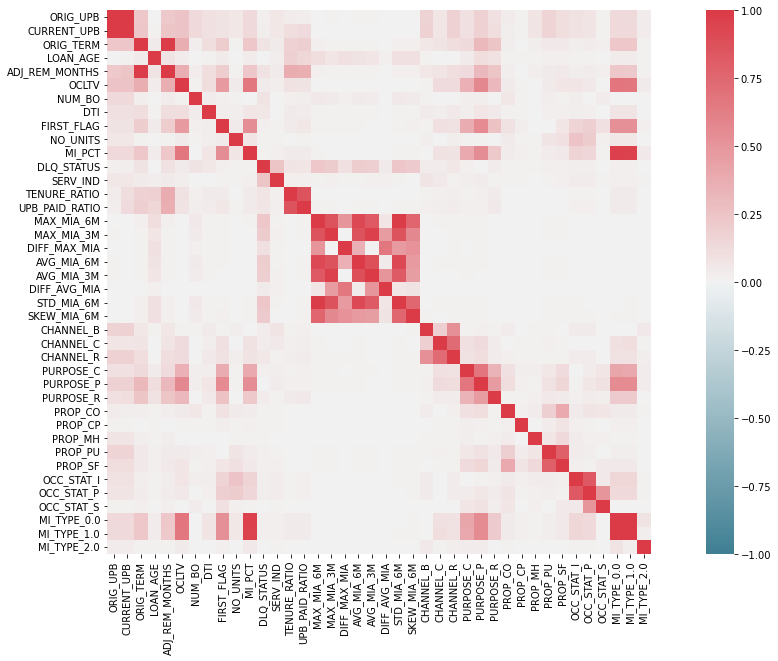

In [17]:
# Plotting correlation heatmap
corr = df.corr().abs()
# corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [18]:

# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = df.corr().abs()
corr_matrix.head()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
print(to_drop)

There are 7 columns to remove.
['CURRENT_UPB', 'ADJ_REM_MONTHS', 'AVG_MIA_6M', 'AVG_MIA_3M', 'STD_MIA_6M', 'MI_TYPE_0.0', 'MI_TYPE_1.0']


In [19]:
df = df.drop(columns=to_drop)

In [20]:
df.shape

(164067, 33)

In [21]:
from yellowbrick.classifier import ClassBalance, ClassificationReport, ConfusionMatrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score,accuracy_score
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set(rc={'figure.figsize': (15, 6)})

In [22]:
df.head()

,ORIG_UPB,ORIG_TERM,LOAN_AGE,OCLTV,NUM_BO,DTI,FIRST_FLAG,NO_UNITS,MI_PCT,DLQ_STATUS,SERV_IND,TENURE_RATIO,UPB_PAID_RATIO,MAX_MIA_6M,MAX_MIA_3M,DIFF_MAX_MIA,DIFF_AVG_MIA,SKEW_MIA_6M,CHANNEL_B,CHANNEL_C,CHANNEL_R,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,MI_TYPE_2.0
LOAN_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
133801946,140000.0,360,2.0,53,1,45.0,1,1,0.0,1,0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
133801983,437000.0,360,3.0,60,1,46.0,0,1,0.0,1,0,0.99,1.00,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
133802028,76000.0,360,2.0,80,1,41.0,0,1,0.0,1,0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
133802049,105000.0,360,8.0,75,1,40.0,0,2,0.0,1,0,0.96,0.98,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
133802085,624000.0,360,2.0,80,1,48.0,1,1,0.0,1,0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


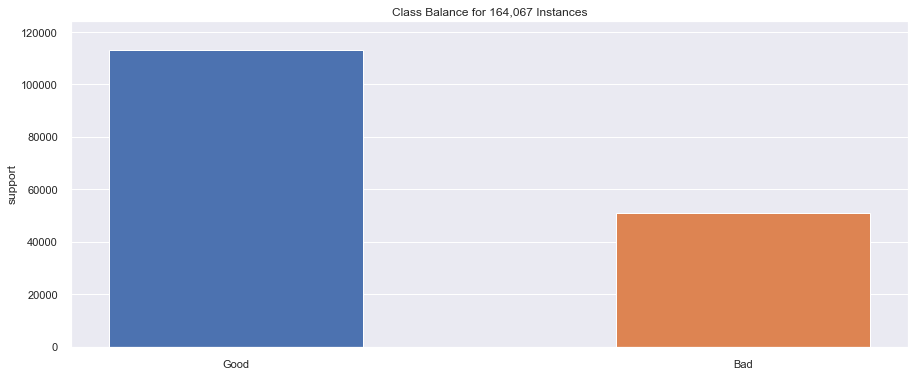

<AxesSubplot:title={'center':'Class Balance for 164,067 Instances'}, ylabel='support'>

In [23]:
feature_list = list(df.columns)
feature_list.remove("DLQ_STATUS")
X = df[feature_list]
y = df["DLQ_STATUS"]
target_vector = df["DLQ_STATUS"].values.flatten()
target_balance = ClassBalance(labels=['Good', 'Bad'])
target_balance.fit(target_vector)
target_balance.show()

In [24]:
X['DTI']= X['DTI'].fillna(999)

/var/folders/g2/1_pm5zl13x5dml9xy_pz6dvr0000gn/T/ipykernel_91182/1769624297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DTI']= X['DTI'].fillna(999)


In [25]:
y.value_counts()

DLQ_STATUS
0    113031
1     51036
Name: count, dtype: int64

### Feature selection via random forest regressor

In [26]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Feature importance
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame({'feature': list(X.columns), 
    'importance': rf.feature_importances_}).sort_values('importance', ascending = False)
feature_importances.head(15)

,feature,importance
0,ORIG_UPB,0.172946
10,TENURE_RATIO,0.169400
2,LOAN_AGE,0.110351
5,DTI,0.103545
3,OCLTV,0.089410
12,MAX_MIA_6M,0.073794
9,SERV_IND,0.060170
11,UPB_PAID_RATIO,0.044523
1,ORIG_TERM,0.036492
4,NUM_BO,0.013600


Text(0.5, 0, 'Random Forest Feature Importance')

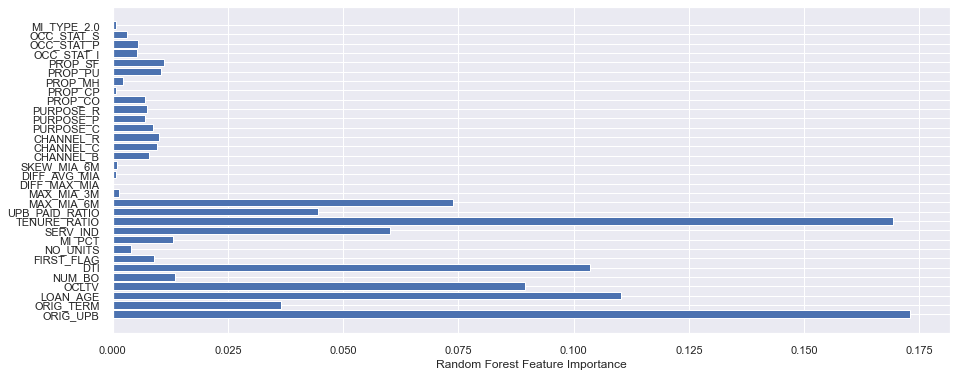

In [27]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(list(X.columns), rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [28]:
X_mod  = X[feature_importances.head(15)["feature"].to_list()]
feature_names = feature_importances.head(15)["feature"].to_list()
X_train, X_test, y_train, y_test = train_test_split(X_mod, y, test_size=0.30, random_state=0)

### Training model 

In [29]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SGDClassifier(),
    XGBClassifier(eval_metric='logloss')]

In [30]:
def training_cv_score_model(X, y, model):
    """
    This function takes the design matrix and target vector of the training set,
    along with a classification estimator and computes a 5 fold cross validated
    mean and standard deviation based on balanced accuracy.
    This score is printed to the end user.
    """
    numeric_transformer = Pipeline(steps=[
        ('scale_x_num', StandardScaler())
    ])

    pre_processor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, feature_names)
    ])

    clf = Pipeline(steps=[
        ('preprocessor', pre_processor),
        ('classifier', model)
    ])

    scores = cross_val_score(clf,
                             X,
                             y.values.flatten(),
                             scoring='balanced_accuracy',
                             cv=10)

    mean_score = scores.mean()
    avg_score = scores.std()

    model_name = clf.named_steps['classifier'].__class__.__name__

    print(f'{model_name}, Average Score : {mean_score} & Standard Deviation: {avg_score}')
    print('-'*90)

In [31]:
def out_of_sample_score(train_features, train_target, test_features, test_target, model):
    """
    This function takes the design matrix and target vector of the validation set,
    along with a classification estimator and
    scores the predicted classes and true values via a balanced accuracy score.
    This score is printed to the end user.
    """
    numeric_transformer = Pipeline(steps=[
        ('scale_x_num', StandardScaler())
    ])

    pre_processor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, feature_names)
    ])

    clf = Pipeline(steps=[
        ('preprocessor', pre_processor),
        ('classifier', model)
    ])

    model_name = clf.named_steps['classifier'].__class__.__name__

    clf.fit(train_features, train_target.values.ravel())

    preds = clf.predict(test_features)
    score = balanced_accuracy_score(y_true=test_target, y_pred=preds)

    print(f'{model_name} with balanced accuracy on test set {score}')
    print('-'*90)

In [32]:
def visualise_out_of_sample(train_features, train_target, test_features, test_target, model):
    """
    This function takes the design matrix and target vector of the validation set,
    along with a classification estimator and
    scores the predicted classes and true values via a classification report and
    a confusion matrix.
    """
    # Classification pipeline
    numeric_transformer = Pipeline(steps=[
        ('scale_x_num', StandardScaler())
    ])

    pre_processor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, feature_names)
    ])

    clf = Pipeline(steps=[
        ('preprocessor', pre_processor),
        ('classifier', model)
    ])

    # Classification report
    clf_report = ClassificationReport(clf, classes=['Good', 'Bad'],
                                      cmap="YlGn", size=(600, 360))

    clf_report.fit(train_features, train_target.values.flatten())
    clf_report.score(test_features, test_target.values.flatten())
    clf_report.show()

    # Confusion matrix
    cm = ConfusionMatrix(clf, classes=['Good', 'Bad'])


    cm.fit(train_features, y_train.values.flatten())
    cm.score(test_features, test_target.values.flatten())
    cm.show()

In [33]:
def visualise_validation(train_features, train_target, test_features, test_target, model):
    """
    This function takes the design matrix and target vector of the validation set,
    along with a classification estimator and
    scores the predicted classes and true values via a classification report and
    a confusion matrix.
    """
    # Classification pipeline
    numeric_transformer = Pipeline(steps=[
        ('scale_x_num', StandardScaler())
    ])

    pre_processor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, feature_names)
    ])

    clf = Pipeline(steps=[
        ('preprocessor', pre_processor),
        ('classifier', model)
    ])

    # Classification report
    clf_report = ClassificationReport(clf, classes=['Good', 'Bad'],
                                      cmap="YlGn", size=(600, 360))

    clf_report.fit(train_features, train_target.values.flatten())
    clf_report.score(test_features, test_target.values.flatten())
    clf_report.show()

    # Confusion matrix
    cm = ConfusionMatrix(clf, classes=['Good', 'Bad'])


    cm.fit(train_features, y_train.values.flatten())
    cm.score(test_features, test_target.values.flatten())
    cm.show()

In [34]:
for model in models:
    try:
        training_cv_score_model(X_train, y_train, model)
    except Exception as e:
        raise e

LogisticRegression, Average Score : 0.6158685746131517 & Standard Deviation: 0.0027717312655064366
------------------------------------------------------------------------------------------
RandomForestClassifier, Average Score : 0.7626114575894214 & Standard Deviation: 0.004276196351522121
------------------------------------------------------------------------------------------
SGDClassifier, Average Score : 0.6160591241327615 & Standard Deviation: 0.0028384827405960556
------------------------------------------------------------------------------------------
XGBClassifier, Average Score : 0.777460862460744 & Standard Deviation: 0.0024505439197542163
------------------------------------------------------------------------------------------


In [35]:
for model in models:
    try:
        out_of_sample_score(X_train, y_train, X_test, y_test, model)
    except Exception as e:
        raise e

LogisticRegression with balanced accuracy on test set 0.6182740738768993
------------------------------------------------------------------------------------------
RandomForestClassifier with balanced accuracy on test set 0.764565780058279
------------------------------------------------------------------------------------------
SGDClassifier with balanced accuracy on test set 0.6183761640638714
------------------------------------------------------------------------------------------
XGBClassifier with balanced accuracy on test set 0.7806665838532225
------------------------------------------------------------------------------------------


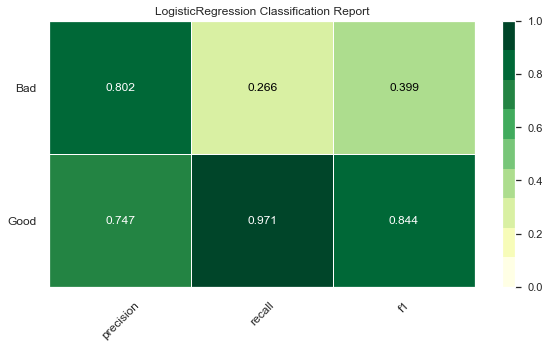

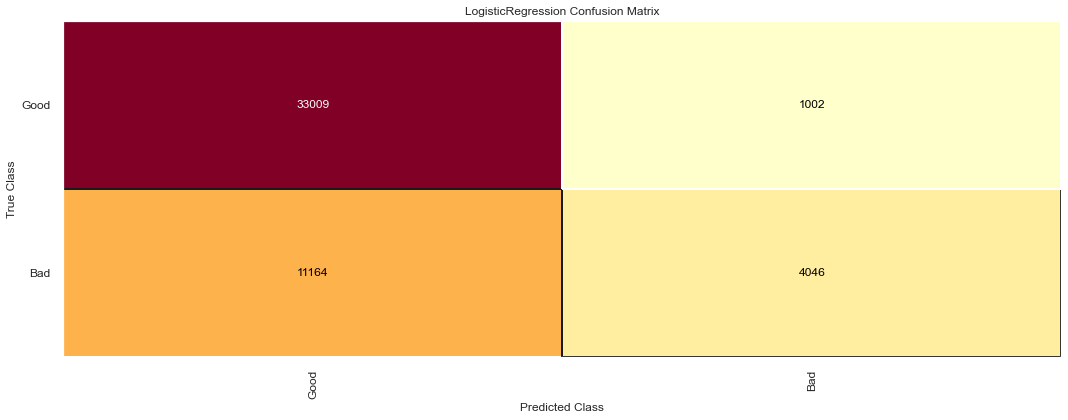

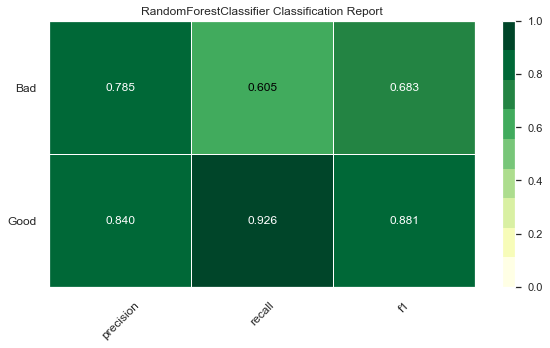

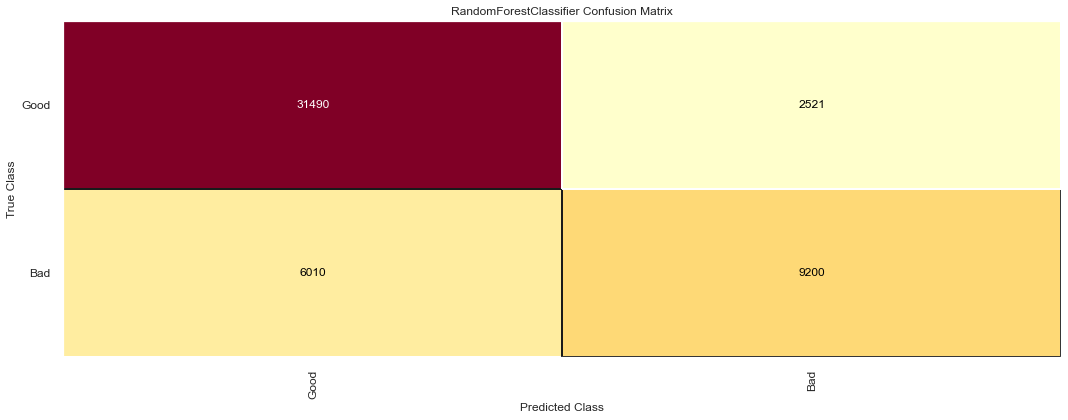

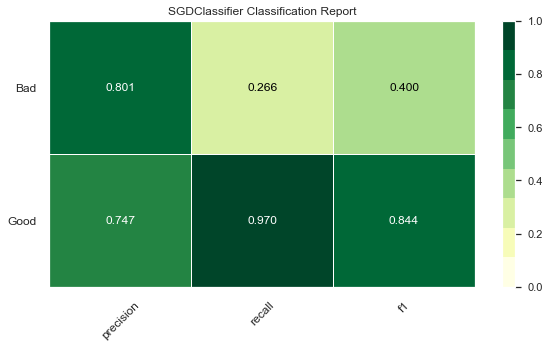

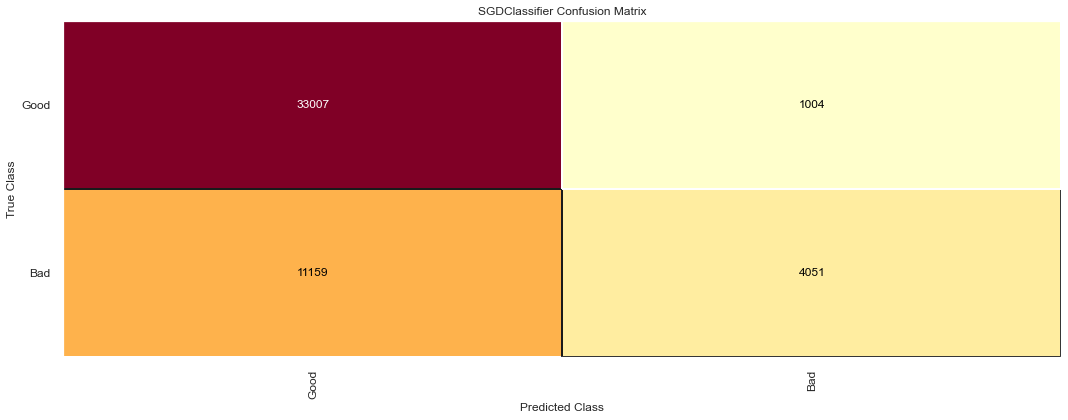

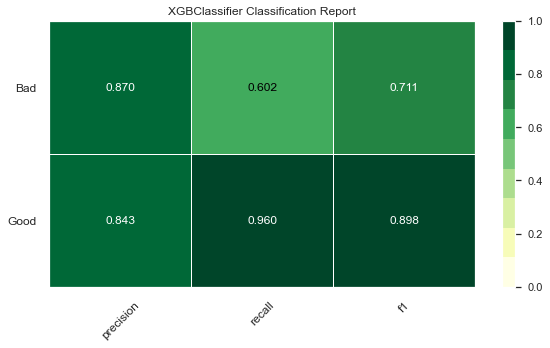

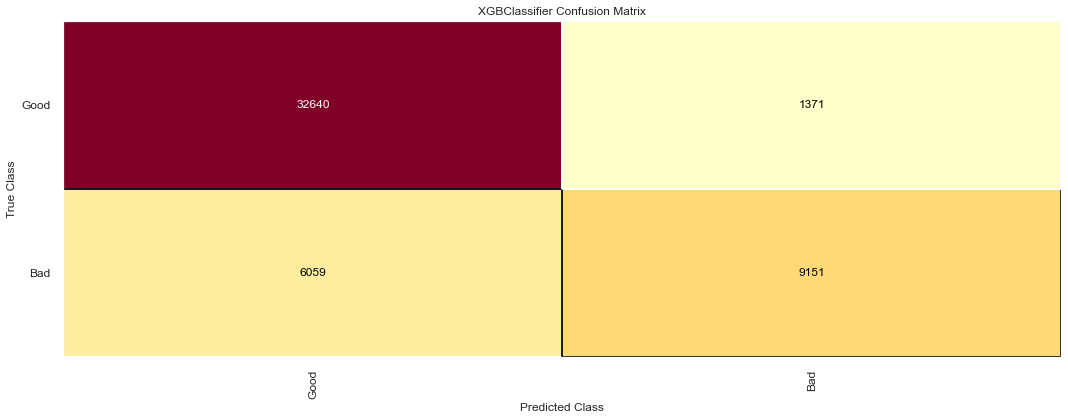

In [36]:
for model in models:
    try:
        visualise_out_of_sample(X_train, y_train, X_test, y_test, model)
    except Exception as e:
        raise e

### Hyperparameter tuning

In [66]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.1, 0.3, 0.01],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=10, scoring='balanced_accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.3, 'max_depth': 6, 'subsample': 0.7}
Best score:  0.7778808038123572


In [67]:
training_cv_score_model(X_train, y_train, grid_search.best_estimator_)

XGBClassifier, Average Score : 0.7778808038123572 & Standard Deviation: 0.0024336256222317353
------------------------------------------------------------------------------------------


In [68]:
out_of_sample_score(X_train, y_train, X_test, y_test, grid_search.best_estimator_)

XGBClassifier with balanced accuracy on test set 0.7793126449344008
------------------------------------------------------------------------------------------


### OOT performance evaluation

#### Getting OOT dataset

In [31]:
oot = con.execute("""
    select 
      LOAN_ID,
      cast(right(ACT_PERIOD,4) as int) as ACT_YR,
      cast(strptime(concat(left(ACT_PERIOD,len(ACT_PERIOD)-4),'/',right(ACT_PERIOD,4)),'%m/%Y') as date) as ACT_PERIOD,
      CHANNEL,ORIG_UPB,CURRENT_UPB,ORIG_TERM,
      cast(right(FIRST_PAY,4) as int) as FIRST_PAY_YR,
      cast(strptime(concat(left(FIRST_PAY,len(FIRST_PAY)-4),'/',right(FIRST_PAY,4)),'%m/%Y') as date) as FIRST_PAY,
      LOAN_AGE,case when ADJ_REM_MONTHS is null then REM_MONTHS else ADJ_REM_MONTHS end as ADJ_REM_MONTHS,OCLTV,NUM_BO,DTI,
      case when FIRST_FLAG= 'Y' then 1 else 0 end as FIRST_FLAG,
      PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE, ifnull(MI_PCT,0) as MI_PCT,DLQ_STATUS,
      cast(case when left(right(PMT_HISTORY,4),2)='XX' then null else left(right(PMT_HISTORY,4),2) end as float) as MTH1,
      cast(case when left(right(PMT_HISTORY,6),2)='XX' then null else left(right(PMT_HISTORY,6),2) end as float) as MTH2,
      cast(case when left(right(PMT_HISTORY,8),2)='XX' then null else left(right(PMT_HISTORY,8),2) end as float) as MTH3,
      cast(case when left(right(PMT_HISTORY,10),2)='XX' then null else left(right(PMT_HISTORY,10),2) end as float) as MTH4,
      cast(case when left(right(PMT_HISTORY,12),2)='XX' then null else left(right(PMT_HISTORY,12),2) end as float) as MTH5,
      cast(case when left(right(PMT_HISTORY,14),2)='XX' then null else left(right(PMT_HISTORY,14),2) end as float) as MTH6,
      ifnull(MI_TYPE,0) as MI_TYPE,
      case when SERV_IND = 'Y' then 1 else 0 end as  SERV_IND
    from '*.parquet' 
    where FIRST_PAY<ACT_PERIOD
    and ACT_PERIOD in ('12023','22023','32023')
    and cast(case when left(right(PMT_HISTORY,4),2)='XX' then null else left(right(PMT_HISTORY,4),2) end as int) = 0 
    and DLQ_STATUS in (0,1)
   """).df()
oot.shape

(978030, 30)

In [33]:
oot.groupby('DLQ_STATUS')['LOAN_ID'].count()

DLQ_STATUS
0    973562
1      4468
Name: LOAN_ID, dtype: int64

In [34]:
973562/(973562+4468)

0.9954316329764936

In [47]:
oot = oot.drop(columns=['ACT_YR','ACT_PERIOD','FIRST_PAY_YR','FIRST_PAY'])

In [48]:
oot['TENURE_RATIO'] = (oot['ADJ_REM_MONTHS']/oot['ORIG_TERM']).round(2)
oot['UPB_PAID_RATIO'] = (oot['CURRENT_UPB']/oot['ORIG_UPB']).round(2)
oot['MAX_MIA_6M'] = oot[['MTH1','MTH2','MTH3','MTH4','MTH5','MTH6']].max(axis=1)
oot['MAX_MIA_3M'] = oot[['MTH1','MTH2','MTH3']].max(axis=1)
oot['DIFF_MAX_MIA'] = oot['MAX_MIA_3M'] - oot['MAX_MIA_6M']
oot['AVG_MIA_6M'] = oot[['MTH1','MTH2','MTH3','MTH4','MTH5','MTH6']].mean(axis=1)
oot['AVG_MIA_3M'] = oot[['MTH1','MTH2','MTH3']].mean(axis=1)
oot['DIFF_AVG_MIA'] = oot['AVG_MIA_3M'] - oot['AVG_MIA_6M']
oot['STD_MIA_6M'] = oot[['MTH1','MTH2','MTH3','MTH4','MTH5','MTH6']].std(axis=1)
oot['STD_MIA_6M'] = oot['STD_MIA_6M'].fillna(0)
oot['SKEW_MIA_6M'] = oot[['MTH1','MTH2','MTH3','MTH4','MTH5','MTH6']].skew(axis=1)
oot['SKEW_MIA_6M'] = oot['SKEW_MIA_6M'].fillna(0)
oot['DTI'] = oot['DTI'].fillna(999)

In [49]:
oot = pd.get_dummies(oot, columns = ['CHANNEL', 'PURPOSE','PROP','OCC_STAT','MI_TYPE'],dtype=int) 
oot = oot.drop(columns=['MTH1','MTH2','MTH3','MTH4','MTH5','MTH6','STATE'])

In [50]:
oot = oot.drop(columns=to_drop)

In [51]:
X_oot = oot[feature_names]
y_oot = oot["DLQ_STATUS"]

In [52]:
X_oot.columns[X_oot.isna().any()].tolist()

[]

In [30]:
oot['DLQ_STATUS'].values()

NameError: name 'oot' is not defined

In [53]:
print(X_oot.shape)
print(y_oot.shape)

(978030, 15)
(978030,)


In [69]:
out_of_sample_score(X_train, y_train, X_oot, y_oot, grid_search.best_estimator_)

XGBClassifier with balanced accuracy on test set 0.8119609869268942
------------------------------------------------------------------------------------------


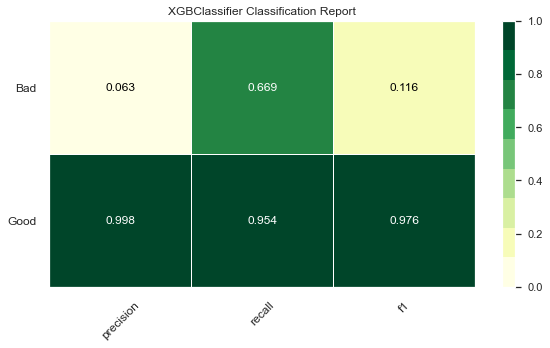

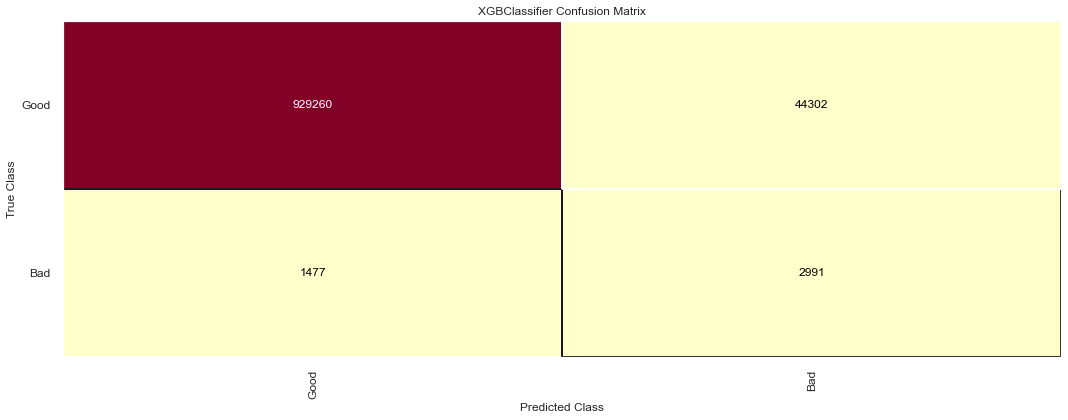

In [70]:
visualise_out_of_sample(X_train, y_train, X_oot, y_oot, grid_search.best_estimator_)

In [ ]:
## 

# Interpretability

In [71]:
import shap

shap.initjs()
X_sampled = X_oot.sample(100, random_state=10)
explainer = shap.TreeExplainer(grid_search.best_estimator_)
shap_values = explainer.shap_values(X_sampled)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:])


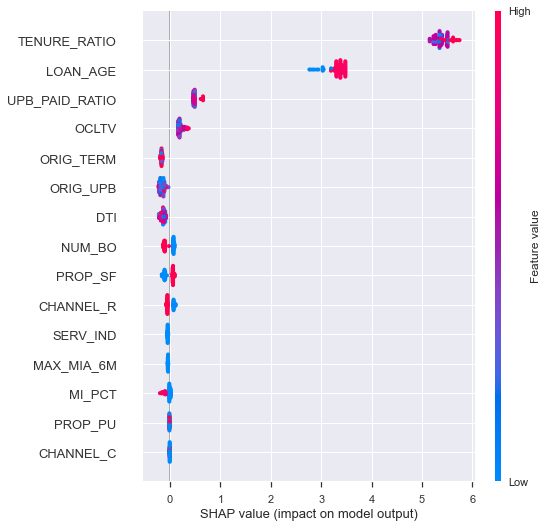

In [61]:
shap.summary_plot(shap_values, X_sampled)

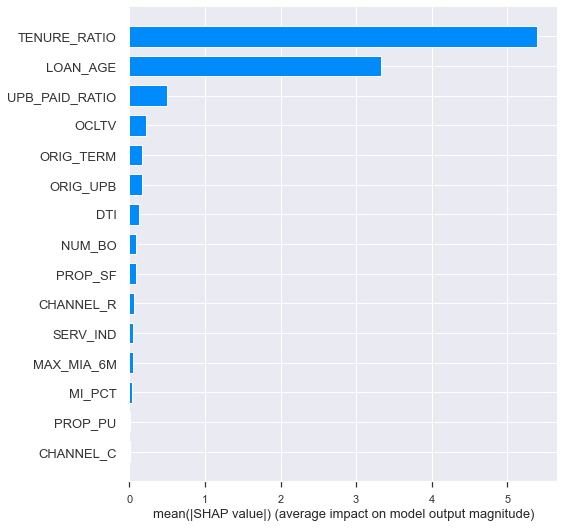

In [62]:
shap.summary_plot(shap_values, X_sampled, plot_type="bar")